### STOCK PREDICTIONS using RANDOM FOREST

Random Forest is an ensemble learning method based on decision tree algorithms. It creates a multitude of decision trees at training time and outputs the mean/average prediction of the individual trees. Random Forest can capture complex non-linear patterns without needing transformations.

Pros: Handling Non_linearity, Robustness
Cons: Interpretability, Computationally Intensive 

In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
stock = yf.Ticker("AAPL")
stock = stock.history(period='2y')


<Axes: xlabel='Date'>

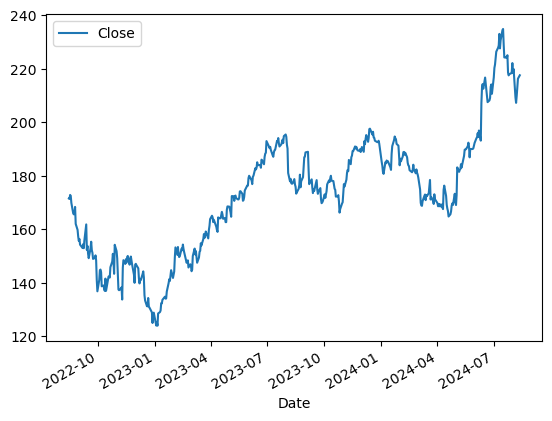

In [3]:
del stock['Dividends']
del stock['Stock Splits']
stock.plot.line(y="Close")


In [4]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [5]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [6]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-15 00:00:00-04:00,169.836777,171.688421,169.668448,171.490387,54091700,171.331955,0
2022-08-16 00:00:00-04:00,171.084408,172.005290,169.975404,171.331955,56377100,172.837036,1
2022-08-17 00:00:00-04:00,171.074506,174.421325,170.876471,172.837036,79542000,172.440948,0
2022-08-18 00:00:00-04:00,172.044880,173.183588,171.421058,172.440948,62290100,169.836761,0
2022-08-19 00:00:00-04:00,171.331937,172.034976,169.628816,169.836761,70346300,165.925522,0
...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,205.300003,209.990005,201.070007,207.229996,69660500,209.820007,1
2024-08-07 00:00:00-04:00,206.899994,213.639999,206.389999,209.820007,63516400,213.309998,1
2024-08-08 00:00:00-04:00,213.110001,214.199997,208.830002,213.309998,47161100,216.240005,1


In [7]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
#original_index = X.index

In [8]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
#X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [ ]:
# Define the model
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
#    tf.keras.layers.Dense(32, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
#])

In [11]:
# Define the Random Forest model

model = RandomForestClassifier(n_estimators=100, random_state=42)


In [11]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
#model.fit(X_train, y_train, epochs=100, batch_size=32)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Make predictions
#predictions = model.predict(X_test_df).round().flatten()

predictions = model.predict(X_test)


In [14]:
# Evaluate the model using the test data
#model_loss, model_accuracy = model.evaluate(X_test_df, y_test)
#print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

from sklearn.metrics import r2_score


precision = precision_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print(f'Precision: {precision}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'R-squared: {r_squared}')



Precision: 0.9130434782608695
Accuracy: 0.56
Recall: 0.3333333333333333
F1 Score: 0.48837209302325574
R-squared: -0.8876018876018874


Precision is the ratio of true positive predictions to the total number of positive predictions (both true and false positives).

Accuracy is the ratio of correct predictions (both true positives and true negatives) to the total number of predictions.Low accuracy suggests that the model isn't very reliable overall.

Recall (or sensitivity) is the ratio of true positive predictions to the total number of actual positives (true positives and false negatives).Low recall suggests that the model misses a significant number of actual stock price increases (high false negative rate).

F1 Score is the harmonic mean of precision and recall, providing a single metric that balances the two. It ranges from 0 to 1, where 1 indicates perfect precision and recall. However, given that both precision and recall are not very high, the F1 score reflects the model's overall mediocre performance.

R-squared (R²) measures the proportion of variance in the dependent variable (stock price change) that is predictable from the independent variables (features in your model). Negative R-squared values suggest that the model is not fitting the data well and may even be introducing more error than a simple average prediction.

In [15]:
# Combine actual values and predictions

predictions_df = pd.DataFrame(predictions, index=y_test.index, columns=['Predictions'])
combined = pd.concat([y_test, predictions_df], axis=1)

In [ ]:
# Create a DataFrame for predictions with the index of X_test_df
#predictions_df = pd.DataFrame(predictions, index=X_test_df.index, columns=['Predictions'])

In [ ]:
#precision_score(y_test,predictions)

<Axes: title={'center': 'Actual vs. Predicted'}, xlabel='Date'>

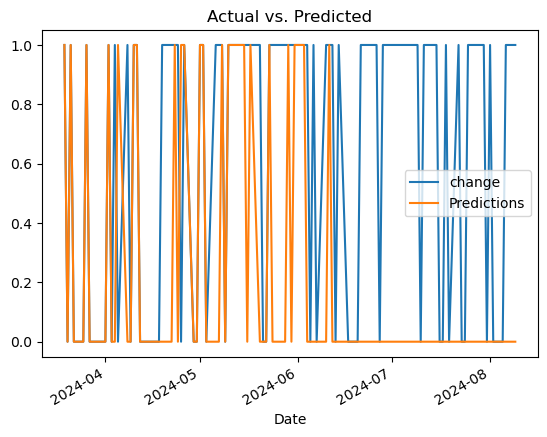

In [16]:
# Combine actual values and predictions
#combined = pd.concat([y_test, predictions_df], axis=1)

# Plot the combined DataFrame
combined.plot(title='Actual vs. Predicted')

In [ ]:
#predictions_df.value_counts()

In [17]:
# Make prediction for the next day

latest_data = X_scaled[-1].reshape(1, -1)
next_day_prediction = model.predict(latest_data)[0]


In [18]:
# Interpret the prediction
if next_day_prediction == 1:
    print("The model predicts that the stock price will increase the next day.")
else:
    print("The model predicts that the stock price will decrease the next day.")

The model predicts that the stock price will decrease the next day.
